# Illustrating basic IRT models

This notebook creates a few figures to illustrate the connections between IRT models and
the sigmoid function, logistic regression, mulitnomial logistic regression, and the Heaviside step function

First version: 4/23/2024
This version: 4/25/2024

In [16]:
import sys
sys.path.append("../")
import numpy as np
from irt_models import (plot_figure,
                        Bock_IRT_response,
                        IRT_parameterization,
                        slope_intercept_parameterization,
                        normalize_Bock_parameterization,
                        Bock_normalized_IRT_response,
                        Bock_normalized_response,
                        transform_Bock_IRT_To_2PL,
                        TwoPL_response,
                        ThreePL_response,
                        Heaviside_response,
                        Samejima_IRT_response)
np.set_printoptions(precision=2)   # number of digits of precision for floating point output (default 8)

# 1: Binary IRT models (k=2 options)

### 1A: Connection Sigmoid function and logistic regression

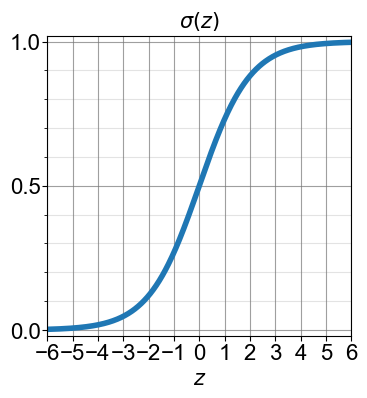

In [17]:
low = -6
high = 6
num = 500
theta = np.linspace(low, high, num)

a = 1
b = 0

y = TwoPL_response(a, b, theta)
plot_figure(theta, y, low, high, title =r"$\sigma(z)$", show_legend=False, fine_grid=True, xlabel=r'$z$', ylabel=None, pdfname="Fig_1_2PL", linewidth=(4,), squaresize=True)

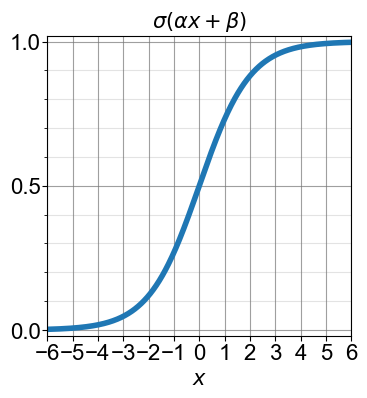

In [18]:
a = 1
b = 0

y = TwoPL_response(a, b, theta)
plot_figure(theta, y, low, high, title =r"$\sigma(\alpha x + \beta)$", show_legend=False, fine_grid=True, xlabel=r'$x$', ylabel=None, pdfname="Fig_2_2PL",  linewidth=(4,), squaresize=True)

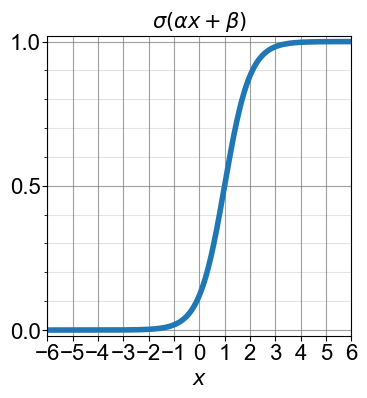

In [19]:
a = 2
b = 1

y = TwoPL_response(a, b, theta)
plot_figure(theta, y, low, high, title =r"$\sigma(\alpha x + \beta)$", show_legend=False, fine_grid=True, xlabel=r'$x$', ylabel=None, pdfname="Fig_3_2PL", linewidth=(4,), squaresize=True)

### 1B: Logistic regression = 2-parameter (2PL) IRT model

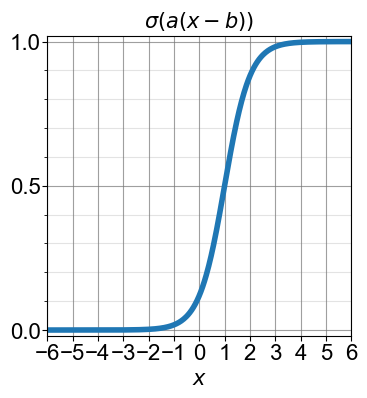

In [20]:
a = 2
b = 1

y = TwoPL_response(a, b, theta)
plot_figure(theta, y, low, high, title =r"$\sigma(a (x - b))$", show_legend=False, fine_grid=True, xlabel=r'$x$', ylabel=None, pdfname="Fig_4_2PL", linewidth=(4,), squaresize=True)

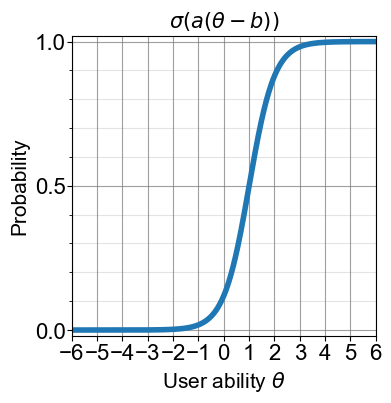

In [21]:
a = 2
b = 1

y = TwoPL_response(a, b, theta)
plot_figure(theta, y, low, high, title =r"$\sigma(a (\theta - b))$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$', pdfname="Fig_5_2PL", linewidth=(4,), squaresize=True)

### 1C: 3PL = 2PL + random guessing

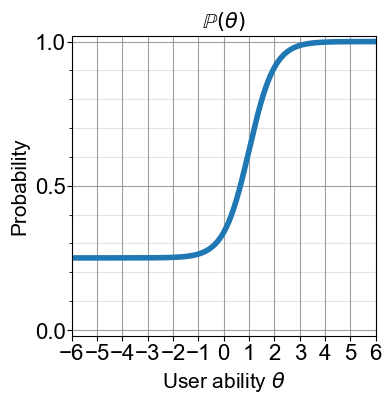

In [22]:
a = 2
b = 1
c = 0.25

y = ThreePL_response(a, b, c, theta)
plot_figure(theta, y, low, high, title =r"$\mathbb{P}(\theta)$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$', pdfname="Fig_6_3PL", linewidth=(4,), squaresize=True)

### 1D: Sigmoid function is a relaxation of Heaviside step function

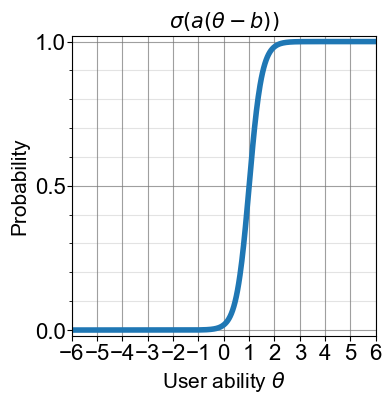

In [23]:
a = 4
b = 1
c = 0

y = ThreePL_response(a, b, c, theta)
plot_figure(theta, y, low, high, title =r"$\sigma(a (\theta - b))$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$', pdfname="Fig_7_2PL", linewidth=(4,), squaresize=True)

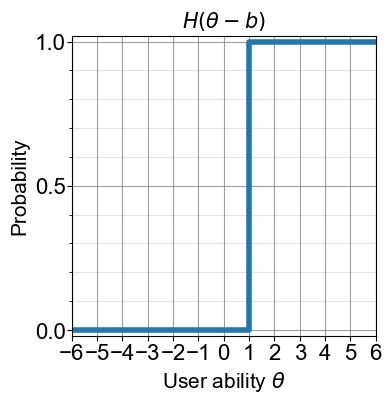

In [24]:
b = 1

(x, y) = Heaviside_response(b, theta)
plot_figure(x, y, low, high, title =r"$H(\theta-b)$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$', pdfname="Fig_8_Heavyside", linewidth=(4,), squaresize=True)

# 2: Multinomial IRT models (k>2 options)

### 2A: Sigmoid function is actually for k=2

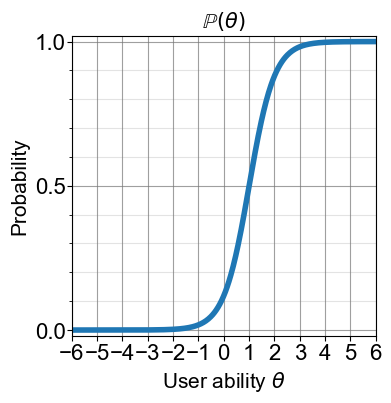

In [25]:
a = 2
b = 1

y = TwoPL_response(a, b, theta)
plot_figure(theta, y, low, high, title =r"$\mathbb{P}(\theta)$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$', pdfname="Fig_9_2PL", linewidth=(4, 4, 4), squaresize=True)

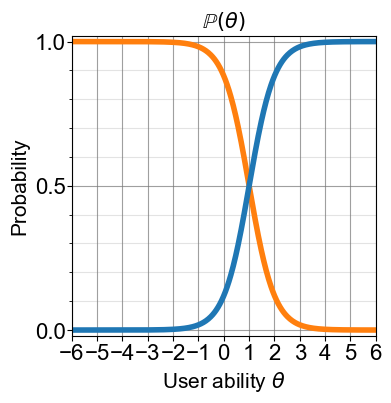

In [26]:
a = np.array([0, 2])
b = np.array([0, 1])

y = Bock_IRT_response(a, b, theta)
plot_figure(theta, y, low, high, title =r"$\mathbb{P}(\theta)$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$', pdfname="Fig_10_Bock",
            color = ['#ff7f0e', '#1f77b4'], linewidth=(4, 4, 4), squaresize=True)     # '#2ca02c'

# import matplotlib.pyplot as plt
# print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

### 2B: Softmax generalizes the Sigmoid function for k>2 (= Bock model)

(a,b):
 [-2  0  2] [-1  0  1]
(alpha,beta):
 [-2  0  2] [-2  0 -2]
normalized (alpha,beta):
 [2 4] [2 0]
normalized (a,b):
 [2 4] [-1.  0.]


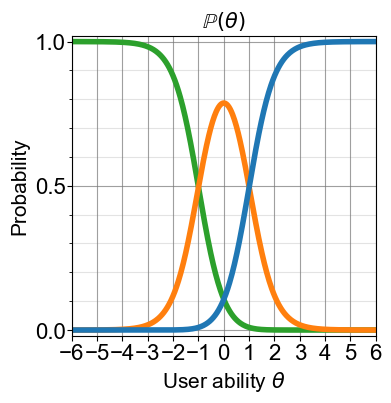

In [27]:
a = np.array([-2, 0, 2])
b = np.array([-1, 0, 1])

# Alternative equivalent parmeterizations:
alpha1, beta1 = slope_intercept_parameterization(a, b)
alpha2, beta2 = normalize_Bock_parameterization(alpha1, beta1)
a3, b3 = IRT_parameterization(alpha2, beta2)
print("(a,b):\n", a, b)
print("(alpha,beta):\n", alpha1, beta1)
print("normalized (alpha,beta):\n", alpha2, beta2)
print("normalized (a,b):\n", a3, b3)

y = Bock_IRT_response(a, b, theta)
plot_figure(theta, y, low, high, title =r"$\mathbb{P}(\theta)$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$', pdfname="Fig_11_Bock",
            color = ['#2ca02c', '#ff7f0e', '#1f77b4'], linewidth=(4, 4, 4), squaresize=True)

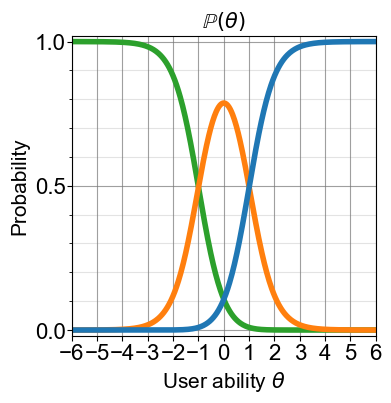

In [28]:
# Different parameterizations
a = np.array([0, 2, 4])
b = np.array([0, -1, 0])
# a = np.array([0, 2, 4])               # gives also same result
# b = np.array([-2, -1, 0])             # gives also same result

y = Bock_IRT_response(a, b, theta)
plot_figure(theta, y, low, high, title =r"$\mathbb{P}(\theta)$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$',
            color = ['#2ca02c', '#ff7f0e', '#1f77b4'], linewidth=(4, 4, 4), squaresize=True)

### 2C: Samejima model = Softmax + random guessing

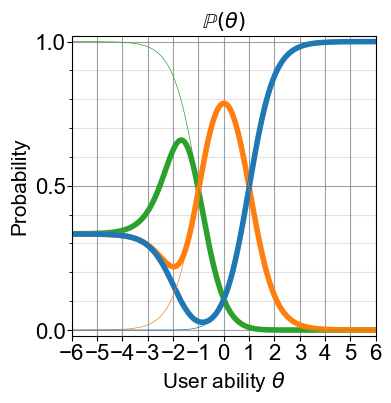

In [29]:
a = np.array([-2, 0, 2, 4])
b = np.array([-2, 0, -1, 0])

y_s = Samejima_IRT_response(a, b, theta)
y_b = Bock_IRT_response(a[1:], b[1:], theta)
plot_figure(theta, (y_s, y_b), low, high, title =r"$\mathbb{P}(\theta)$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$', pdfname="Fig_12_Samejima",
            color = ['#2ca02c', '#ff7f0e', '#1f77b4', '#2ca02c', '#ff7f0e', '#1f77b4'], linewidth=(4, 4, 4, 0.5, 0.5, 0.5), squaresize=True)

# plot_figure(theta, (y_si, y_bi), low, high, title =r"Samejima-IRT vs. Bock-IRT",
#             label=("1", "2", "3", "1", "2", "3"), linewidth=(5, 5, 5, 1, 1, 1))

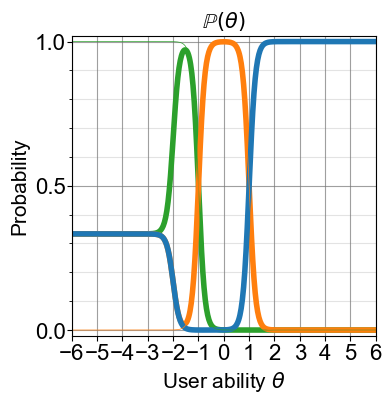

In [30]:
a = np.array([-8, 0, 8, 16])
b = np.array([-2, 0, -1, 0])

y_s = Samejima_IRT_response(a, b, theta)
y_b = Bock_IRT_response(a[1:], b[1:], theta)
plot_figure(theta, (y_s, y_b), low, high, title =r"$\mathbb{P}(\theta)$", show_legend=False, fine_grid=True, xlabel=r'User ability $\theta$', pdfname="Fig_13_Samejima",
            color = ['#2ca02c', '#ff7f0e', '#1f77b4', '#2ca02c', '#ff7f0e', '#1f77b4'], linewidth=(4, 4, 4, 0.5, 0.5, 0), squaresize=True)